# Development Notebook for the JSON parser

In [1]:
# !pip uninstall -y afc
# !pip install ..

### externalConfig.py

### Test it

In [2]:
from afc.externalConfig import read_json_config, DEFAULT_JSON_PATH

In [3]:
import os
import pandas as pd
import datetime as dtm
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

try:
    root = os.path.dirname(os.path.abspath(__file__))
except:
    root = os.getcwd()

from afc.utility.weather import read_tmy3
from afc.ctrlWrapper import Controller, make_inputs
from afc.utility.plotting import plot_standard1

rcontrib: warning - no light sources found
rcontrib: warning - no light sources found
rcontrib: warning - no light sources found


Statistics for presolved model
Original problem has 238 integers (238 of which binary)
Presolved problem has 238 integers (238 of which binary)
==== 504 zero objective 4 different
504 variables have objective of 0
12 variables have objective of 0.174093
21 variables have objective of 2.08912
1 variables have objective of 21.1
==== absolute objective values 4 different
504 variables have objective of 0
12 variables have objective of 0.174093
21 variables have objective of 2.08912
1 variables have objective of 21.1
==== for integers 238 zero objective 1 different
238 variables have objective of 0
==== for integers absolute objective values 1 different
238 variables have objective of 0
===== end objective counts


Problem has 401 rows, 538 columns (34 with objective) and 1827 elements
There are 4 singletons with no objective 
Column breakdown:
1 of type 0.0->inf, 174 of type 0.0->up, 14 of type lo->inf, 
53 of type lo->up, 58 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type 

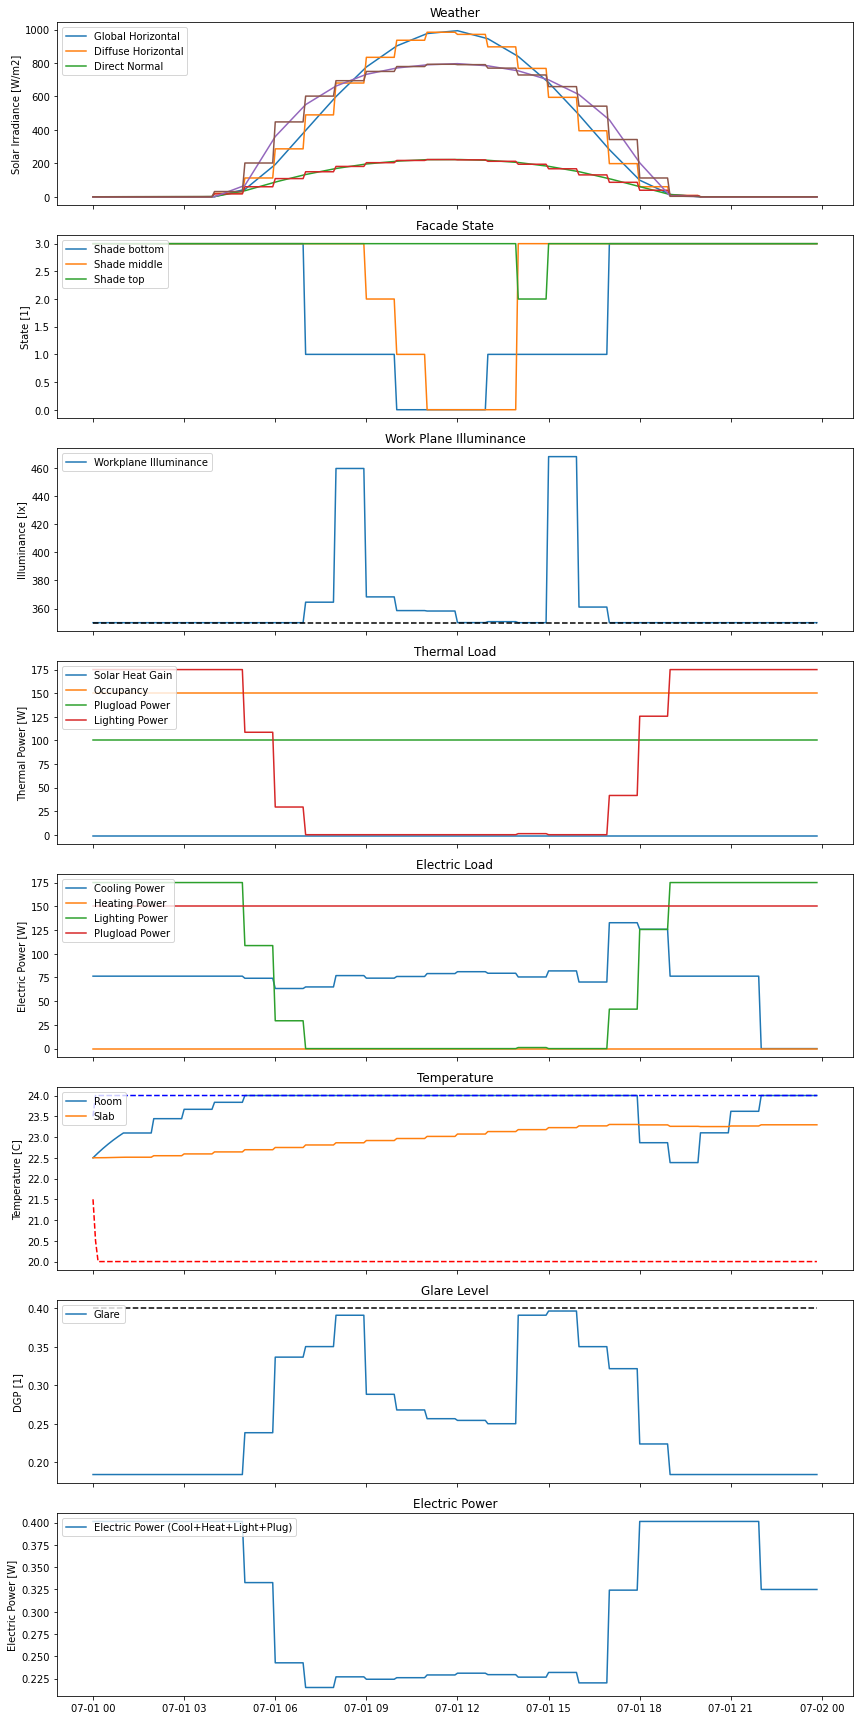

In [4]:
# Import and read weather (forecast) data
weather_path = os.path.join(os.path.dirname(root), 'dev', 'resources', 'weather',
    'USA_CA_San.Francisco.Intl.AP.724940_TMY3.csv')
weather, info = read_tmy3(weather_path, coerce_year=2023)
weather = weather.resample('5min').interpolate()
st = dtm.datetime(2023, 7, 1)
wf = weather.loc[st:st+pd.DateOffset(hours=24),]
wf = wf[['temp_air','dni','dhi','wind_speed']+['ghi']].copy()
wf = wf[wf.index.date == wf.index[0].date()]

# Initialize controller
ctrl = Controller()

# Path to json configuration
json_config_path = DEFAULT_JSON_PATH

# Create the inputs vector
parameter = read_json_config(json_config_path)
inputs = make_inputs(parameter, wf)

# Query controller
ctrl.do_step(inputs=inputs) # Initialize
print('Log-message:\n', ctrl.do_step(inputs=inputs))
print('Duration:\n', ctrl.get_output(keys=['rad_duration', 'varts_duration',
                                           'optall_duration', 'glare_duration',
                                           'opt_duration', 'outputs_duration', 'duration']))
print('Optimization:\n', ctrl.get_output(keys=['opt_objective', 'opt_duration',
                                               'opt_termination', 'duration']))
df = pd.DataFrame(ctrl.get_output(keys=['df_output'])['df_output'])
df.index = pd.to_datetime(pd.to_numeric(df.index), unit='ms')

# Remove slab constraints for plotting
df['Temperature 1 Min [C]'] = None
df['Temperature 1 Max [C]'] = None
plot_standard1(pd.concat([wf, df], axis=1).ffill().iloc[:-1])